In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
import sys
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
# songs_data = pd.read_csv("data/spotify_most_streamed_2024.zip", compression='zip', encoding='unicode_escape', header=0, sep=',', quotechar='"')

In [3]:
songs_data = pd.read_csv("data/spotify_most_streamed_2024.zip", encoding='unicode_escape')

In [4]:
songs_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [5]:
songs_data.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [6]:
songs_data.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

### Let's make column names like album_name

In [7]:
songs_data.columns = (songs_data.columns
                        .str.lower()
                        .str.replace(' ', '_'))

In [8]:
songs_data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

### Analyzing the data we see that the tidal_popularity column has too many nan. Let's see what data we have in this column.

In [9]:
songs_data.tidal_popularity.unique()

array([nan])

### All data in the tidal_popularity column is nan. Then we don't need this column. We'll drop it. But first we'll save a backup_copy of our songs_data. We will always keep a backup when we transform our dataset.

In [10]:
songs_data_backup_1 = songs_data
songs_data = songs_data.drop(columns=["tidal_popularity"])

In [11]:
songs_data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track'],
      dtype='object')

In [12]:
songs_data.spotify_streams.unique()

array(['390,470,936', '323,703,884', '601,309,283', ..., '189,972,685',
       '145,467,020', '255,740,653'], dtype=object)

In [13]:
def all_columns_unique_values():
    for col in songs_data.columns:
        print(f"Unique values in column \'{col}\': \n {songs_data[col].unique()}\n\n **************** \n")

# We call the function        
all_columns_unique_values()

Unique values in column 'track': 
 ['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']

 **************** 

Unique values in column 'album_name': 
 ['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']

 **************** 

Unique values in column 'artist': 
 ['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']

 **************** 

Unique values in column 'release_date': 
 ['4/26/2024' '5/4/2024' '3/19/2024' ... '10/31/2018' '11/8/2016'
 '4/11/2017']

 **************** 

Unique values in column 'isrc': 
 ['QM24S2402528' 'USUG12400910' 'QZJ842400387' ... 'USUG12000043'
 'INY091600067' 'USB271700107']

 **************** 

Unique values in column 'all_time_rank': 
 ['1' '2' '3' ... '4,571' '4,591' '4,593']

 **************** 

Uniqu

In [14]:
print(sys.maxsize)

9223372036854775807


### We could convert explicit_track to bool because it contains only 0 and 1.

In [15]:
songs_data_backup_2 = songs_data
songs_data.explicit_track = songs_data.explicit_track.astype(bool)

In [16]:
songs_data.explicit_track.unique()

array([False,  True])

### Let's convert release_date to datetime. We'll use parse from dateutil.parser and datetime and will make function string_to_date().

In [17]:
songs_data.release_date.unique()

array(['4/26/2024', '5/4/2024', '3/19/2024', ..., '10/31/2018',
       '11/8/2016', '4/11/2017'], dtype=object)

In [18]:
def string_to_date(date_string):
    return parse(date_string)

In [19]:
songs_data.release_date = songs_data.release_date.apply(string_to_date)

In [20]:
songs_data.release_date.unique()

<DatetimeArray>
['2024-04-26 00:00:00', '2024-05-04 00:00:00', '2024-03-19 00:00:00',
 '2023-01-12 00:00:00', '2024-05-31 00:00:00', '2023-11-10 00:00:00',
 '2024-01-18 00:00:00', '2024-02-02 00:00:00', '2024-06-09 00:00:00',
 '2024-05-23 00:00:00',
 ...
 '2015-09-24 00:00:00', '2019-07-18 00:00:00', '2019-06-27 00:00:00',
 '2018-09-20 00:00:00', '2016-06-24 00:00:00', '2016-04-09 00:00:00',
 '2023-06-05 00:00:00', '2018-10-31 00:00:00', '2016-11-08 00:00:00',
 '2017-04-11 00:00:00']
Length: 1562, dtype: datetime64[ns]

### Let's analyze nan values in every column.

In [21]:
def all_columns_nan_values():
    for col in songs_data.columns:
        print(f"All nan values in column \'{col}\': \n {songs_data[col].isna().sum()}\n\n **************** \n")

# Let's call the function
all_columns_nan_values()

All nan values in column 'track': 
 0

 **************** 

All nan values in column 'album_name': 
 0

 **************** 

All nan values in column 'artist': 
 5

 **************** 

All nan values in column 'release_date': 
 0

 **************** 

All nan values in column 'isrc': 
 0

 **************** 

All nan values in column 'all_time_rank': 
 0

 **************** 

All nan values in column 'track_score': 
 0

 **************** 

All nan values in column 'spotify_streams': 
 113

 **************** 

All nan values in column 'spotify_playlist_count': 
 70

 **************** 

All nan values in column 'spotify_playlist_reach': 
 72

 **************** 

All nan values in column 'spotify_popularity': 
 804

 **************** 

All nan values in column 'youtube_views': 
 308

 **************** 

All nan values in column 'youtube_likes': 
 315

 **************** 

All nan values in column 'tiktok_posts': 
 1173

 **************** 

All nan values in column 'tiktok_likes': 
 980

 ******

# TODO - to analyse all columns with NAN and to think what should be done - replace ? remove ?
Useful!
https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp

In [22]:
songs_data.describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,4600,2021-01-27 07:48:18.782608896,1987-07-21 00:00:00,2019-07-16 18:00:00,2022-06-01 00:00:00,2023-08-11 00:00:00,2024-06-14 00:00:00,NaN
track_score,4600.0,41.844043,19.4,23.3,29.9,44.425,725.4,38.543766
spotify_popularity,3796.0,63.501581,1.0,61.0,67.0,73.0,96.0,16.186438
apple_music_playlist_count,4039.0,54.60312,1.0,10.0,28.0,70.0,859.0,71.61227
deezer_playlist_count,3679.0,32.310954,1.0,5.0,15.0,37.0,632.0,54.274538
amazon_playlist_count,3545.0,25.348942,1.0,8.0,17.0,34.0,210.0,25.989826


In [23]:
songs_data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track'],
      dtype='object')

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [24]:
# Variant 1
# Size includes NaN values, count does not:
# Group by artist and count the number of tracks for each artist
artist_song_count = songs_data.groupby('artist')['track'].count()

# Sort the artists by the number of songs in descending order and get the top 5
top_5_artists = artist_song_count.sort_values(ascending=False).head(5)

print(top_5_artists)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: track, dtype: int64


In [25]:
# Variant 2
artist_song_count_1 = songs_data.groupby(['artist','track']).size()

# Sort the artists by the number of songs in descending order and get the top 5
top_5_artists_1 = artist_song_count_1.sort_values(ascending=False).head(5)

print(top_5_artists)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: track, dtype: int64


### Who are the five "clean-mouthed" artists (i.e., with no explicit songs)

In [26]:
# Group by artist and count the number of explicit tracks for each artist
clean_mouthed_artists_count = songs_data.groupby('artist')['explicit_track'].count()

# Sort the artists by the number of explicit tracks in ascending order and get the top 5
top_5_clean_artists = clean_mouthed_artists_count.sort_values(ascending=True).head(5)

print(top_5_clean_artists)

artist
"XY"               1
Mc Ws da leste     1
Mc Poze do Rodo    1
Mc Paiva ZS        1
Mc Livinho         1
Name: explicit_track, dtype: int64


### Print top 5 'dirty_mouthed' artists

In [27]:
# Sort the artists by the number of explicit tracks in descending order and get the top 5
top_5_dirty_artists = clean_mouthed_artists_count.sort_values(ascending=False).head(5)

print(top_5_dirty_artists)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: explicit_track, dtype: int64


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [28]:
songs_data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track'],
      dtype='object')

In [29]:
# Group by artist and count the number of spotify_streams for each artist
most_streamed_artists_count = songs_data.groupby('artist')['spotify_streams'].count()

# Sort the artists by the number of explicit tracks in ascending order and get the top 5
top_5_most_streamed_artists = most_streamed_artists_count.sort_values(ascending=False).head(5)

print(top_5_most_streamed_artists)

artist
Taylor Swift    63
Drake           62
Bad Bunny       60
KAROL G         32
The Weeknd      30
Name: spotify_streams, dtype: int64


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [41]:
songs_data.release_date.unique()

<DatetimeArray>
['2024-04-26 00:00:00', '2024-05-04 00:00:00', '2024-03-19 00:00:00',
 '2023-01-12 00:00:00', '2024-05-31 00:00:00', '2023-11-10 00:00:00',
 '2024-01-18 00:00:00', '2024-02-02 00:00:00', '2024-06-09 00:00:00',
 '2024-05-23 00:00:00',
 ...
 '2015-09-24 00:00:00', '2019-07-18 00:00:00', '2019-06-27 00:00:00',
 '2018-09-20 00:00:00', '2016-06-24 00:00:00', '2016-04-09 00:00:00',
 '2023-06-05 00:00:00', '2018-10-31 00:00:00', '2016-11-08 00:00:00',
 '2017-04-11 00:00:00']
Length: 1562, dtype: datetime64[ns]

In [31]:
# Let's add column year
songs_data['year'] = pd.DatetimeIndex(songs_data['release_date']).year

In [32]:
songs_data['year'].unique()

array([2024, 2023, 2022, 2021, 2015, 2019, 2017, 2020, 2018, 2016, 2011,
       2013, 2014, 2012, 2010, 2009, 2000, 2005, 2004, 1994, 2008, 2002,
       2007, 2003, 2006, 1999, 1987, 1998, 2001, 1991])

<Axes: xlabel='year'>

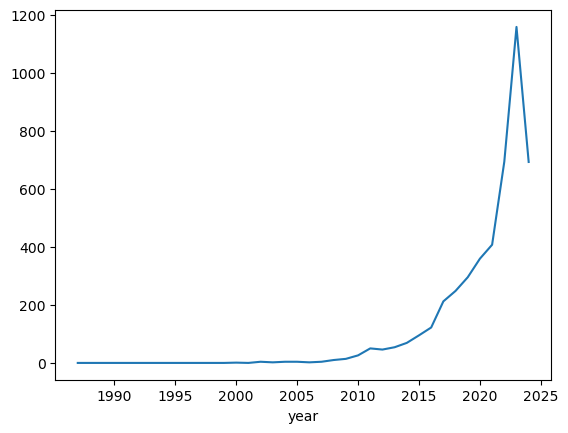

In [33]:
# Plotting by using pandas - released songs by year
songs_data.groupby(['year']).size().plot()

<Axes: xlabel='year'>

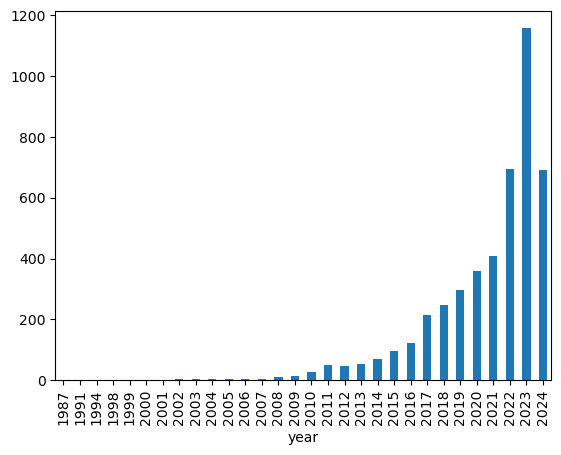

In [34]:
# Plotting by using pandas
songs_data.groupby(['year']).size().plot(kind = "bar")

### For 2024 - The bar is too low because the data is only up to 06-14-2024 - half a year.

In [44]:
songs_data.sort_values(by='release_date', ascending=False)

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track,year,month
11,The Door,The Door,Teddy Swims,2024-06-14,USWB12402486,12,320.2,"111,155,129",2,"263,767",...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,2024,6
316,Pretty Green Eyes (Sunset Ibiza Mix),Pretty Green Eyes (Sunset Ibiza Mix),KETTAMA,2024-06-14,CBEFB2400006,316,85.9,NaN,5,"3,277,306",...,1.0,"87,002",10.0,NaN,NaN,"553,000",NaN,False,2024,6
3579,Tell Me What You Want,Tell Me What You Want - Single,Oden & Fatzo,2024-06-14,GBCPZ2423268,"3,546",22.8,NaN,8,"3,490,536",...,4.0,"6,379,165",6.0,NaN,NaN,"54,974",NaN,False,2024,6
1609,I Am Not Okay,I Am Not Okay,Jelly Roll,2024-06-12,USUG12403674,"1,603",36.6,"4,522",63,"11,074,150",...,1.0,"5,982,846",10.0,"277,638",157,"1,863","7,472",False,2024,6
1492,Show Time,Show Time,SUPER JUNIOR,2024-06-11,KRA302400197,"1,491",38.0,NaN,31,"2,988,530",...,1.0,"337,935",16.0,37,NaN,NaN,303,False,2024,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,Californication,Californication (Deluxe Version),Red Hot Chili Peppers,1999-06-08,USWB19900690,"3,730",22.2,"1,405,353,677","276,377","115,315,508",...,268.0,"1,064,069",30.0,"582,410,010","217,517","9,809,319",NaN,False,1999,6
4167,Beautiful Girls,Groove So Much !,Sean Kingston,1998-04-03,USSM10701781,"4,155",20.8,"178,339,925","189,706","77,373,837",...,75.0,"792,050",12.0,"208,219,623","222,153",NaN,"4,403,782",False,1998,4
2107,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-01-01,USSM19400325,"2,097",31.5,"1,810,649,765","109,411","45,003,974",...,143.0,"1,390,899",125.0,"304,497,253","3,556,791","1,273,462","6,531,412",False,1994,1
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,USGF19942501,"4,510",19.6,"2,021,910,364","410,054","113,406,994",...,256.0,"3,993,523",97.0,"691,979,509","317,966","13,047,851","12,775,440",False,1991,9


In [35]:
# Let's add column month
songs_data['month'] = pd.DatetimeIndex(songs_data['release_date']).month

In [36]:
songs_data['month'].unique()

array([ 4,  5,  3,  1, 11,  2,  6, 10,  9,  8,  7, 12])

<Axes: xlabel='month'>

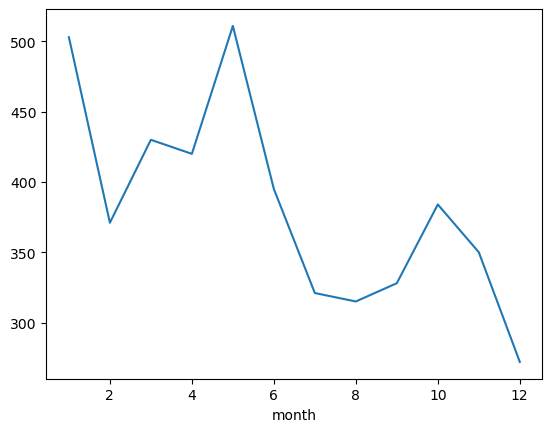

In [37]:
# Plotting by using pandas - released songs by month
songs_data.groupby(['month']).size().plot()

<Axes: xlabel='month'>

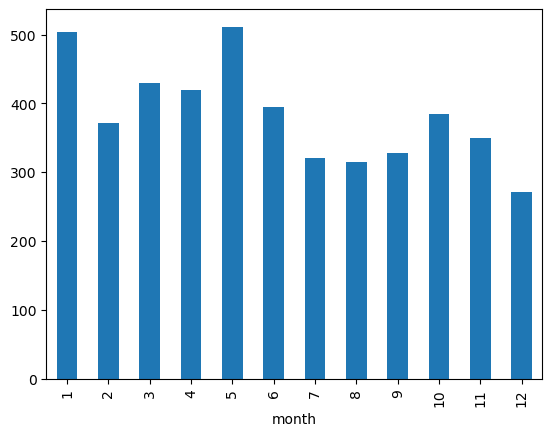

In [38]:
# Plotting by using pandas - released songs by month with bars
songs_data.groupby(['month']).size().plot(kind = "bar")

### Most popular months are january and may.

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [52]:
correlation_columns = [
     'spotify_playlist_count', 
     'apple_music_playlist_count', 
     'deezer_playlist_count', 
     'amazon_playlist_count']

In [53]:
correlation_data = songs_data[correlation_columns]

In [54]:
correlation_data

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
0,"30,716",210.0,62.0,114.0
1,"28,113",188.0,67.0,111.0
2,"54,331",190.0,136.0,172.0
3,"269,802",394.0,264.0,210.0
4,"7,223",182.0,82.0,105.0
...,...,...,...,...
4595,"65,770",3.0,2.0,NaN
4596,"4,602",1.0,1.0,NaN
4597,"72,066",19.0,1.0,6.0
4598,"14,037",1.0,NaN,7.0


In [60]:
cleaned_data = correlation_data.dropna()

In [63]:
cleaned_data.dtypes

spotify_playlist_count         object
apple_music_playlist_count    float64
deezer_playlist_count         float64
amazon_playlist_count         float64
dtype: object

In [65]:
cleaned_data.spotify_playlist_count.unique()

array(['30,716', '28,113', '54,331', ..., '15,387', '72,066', '32,138'],
      dtype=object)

In [73]:
cleaned_data.spotify_playlist_count = cleaned_data.spotify_playlist_count.replace(",", ".", regex=True)
cleaned_data.spotify_playlist_count.astype(float)


C:\Users\Owner\AppData\Local\Temp\ipykernel_10280\3478953851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.spotify_playlist_count = cleaned_data.spotify_playlist_count.replace(",", ".", regex=True)


0        30.716
1        28.113
2        54.331
3       269.802
4         7.223
         ...   
4590     42.233
4591     84.220
4592     15.387
4597     72.066
4599     32.138
Name: spotify_playlist_count, Length: 3253, dtype: float64

In [69]:
correlation_matrix = cleaned_data.corr()
print(correlation_matrix)

                            spotify_playlist_count  \
spotify_playlist_count                    1.000000   
apple_music_playlist_count                0.423610   
deezer_playlist_count                     0.349652   
amazon_playlist_count                     0.241106   

                            apple_music_playlist_count  deezer_playlist_count  \
spotify_playlist_count                        0.423610               0.349652   
apple_music_playlist_count                    1.000000               0.770802   
deezer_playlist_count                         0.770802               1.000000   
amazon_playlist_count                         0.659011               0.569494   

                            amazon_playlist_count  
spotify_playlist_count                   0.241106  
apple_music_playlist_count               0.659011  
deezer_playlist_count                    0.569494  
amazon_playlist_count                    1.000000  


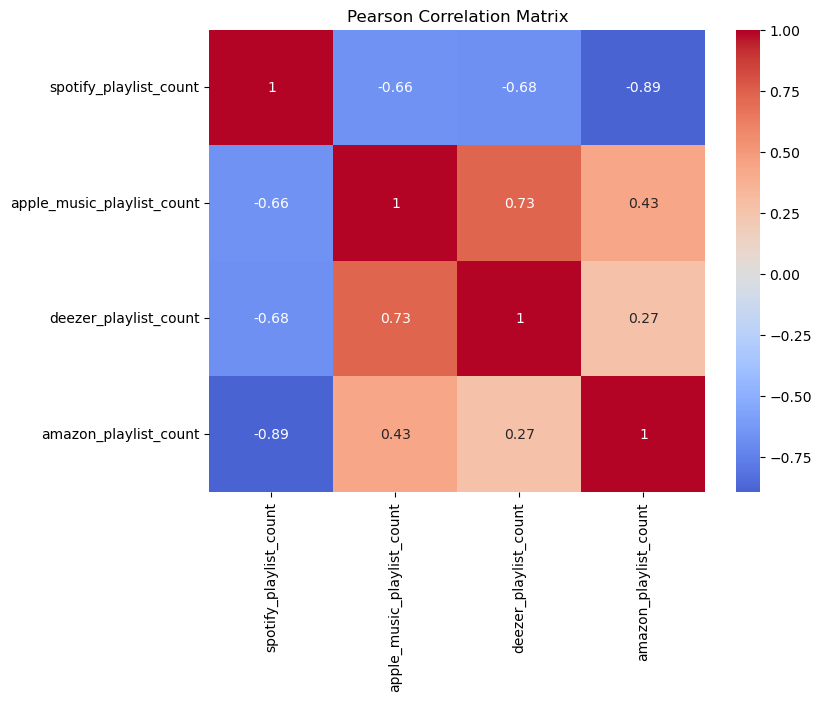

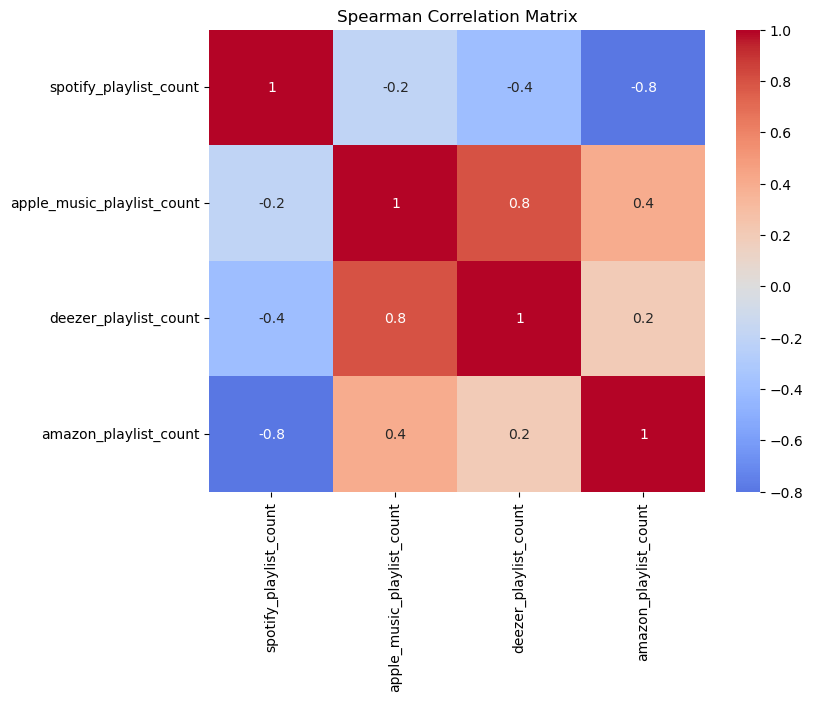

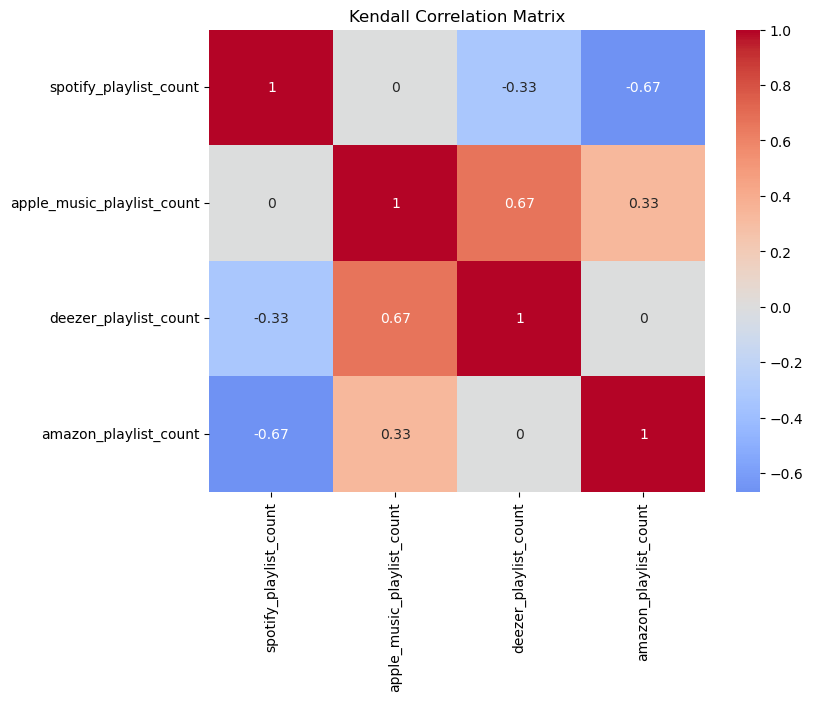

In [70]:
correlation_methods = ['pearson', 'spearman', 'kendall']

for method in correlation_methods:
    corr_matrix = correlation_matrix.corr(method=method)
    
    # Plotting the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

### Analysis of Pearson correlation matrix:
#### High Correlation between 
##### Apple - Deezer - Positive +0.73: 
It suggests that as songs are added more frequently to playlists in Apple, they tend to be added similarly in Deezer.
#### Negative Correlation between 
##### Amazon - Spotify - Negative -0.89:
It suggests that as much songs are added to playlists in Spotify, they tend not to be added in Amazon and vice versa.
etc.
##### Apple - Spotify - Negative -0.66
##### Apple - Amazon - Positive +0.43
##### Deezer - Spotify - Negative -0.68
##### Deezer - Amazon - Positive +0.27
#### Spotify is Negative with all 3, which suggests that if people add songs in Spotify, they add less frequently to other 3 services

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [71]:
songs_data.youtube_views.unique()

array(['84,274,754', '116,347,040', '122,599,116', ..., '201,027,333',
       '1,118,595,159', '866,300,755'], dtype=object)

In [72]:
songs_data.youtube_likes.unique()

array(['1,713,126', '3,486,739', '2,228,730', ..., '1,081,402',
       '3,868,828', '3,826,829'], dtype=object)

In [81]:
# We create our correlation dataset
correlation_columns_1 = [
     'youtube_views', 
     'youtube_likes']
correlation_data_1 = songs_data[correlation_columns_1]

# Clear any row with NAN
cleaned_data_youtube = correlation_data_1.dropna()

cleaned_data_youtube = cleaned_data_youtube.replace(",", ".", regex=True)
cleaned_data_youtube.youtube_views.astype(float)
cleaned_data_youtube.youtube_likes.astype(float)

correlation_matrix_1 = cleaned_data_youtube.corr()

correlation_methods = ['pearson', 'spearman', 'kendall']

for method in correlation_methods:
    corr_matrix = correlation_matrix_1.corr(method=method)
    
    # Plotting the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

ValueError: could not convert string to float: '84.274.754'

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.